# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "GFDL-ESM2M"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-process/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/huss_day_GFDL-ESM2M_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.5933163166046143 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/huss_day_GFDL-ESM2M_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.306011438369751 to load the data
*********Start to merge*********
It takes elapsed_time 1.3307487964630127 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.07487702369689941 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.241661548614502 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6562216281890869 to mask the layer
*********Start to plot the layer*********


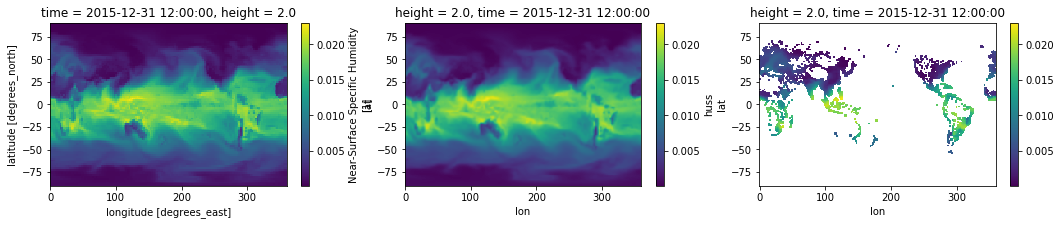

It takes elapsed_time 0.6714155673980713 to plot the layer
It takes elapsed_time 14.281806945800781 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/tas_day_GFDL-ESM2M_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6806087493896484 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/tas_day_GFDL-ESM2M_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2880299091339111 to load the data
*********Start to merge*********
It takes elapsed_time 1.401660442352295 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.03178763389587402 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.24294114112854 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6543068885803223 to mask the layer
*********Start to plot the layer*********


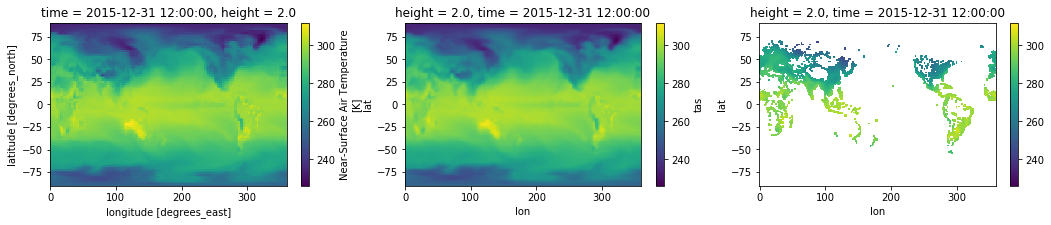

It takes elapsed_time 0.6592440605163574 to plot the layer
It takes elapsed_time 14.278650760650635 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/uas_day_GFDL-ESM2M_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.600750207901001 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/uas_day_GFDL-ESM2M_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.1946167945861816 to load the data
*********Start to merge*********
It takes elapsed_time 1.3892054557800293 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.031033039093017578 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.254917621612549 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6568737030029297 to mask the layer
*********Start to plot the layer*********


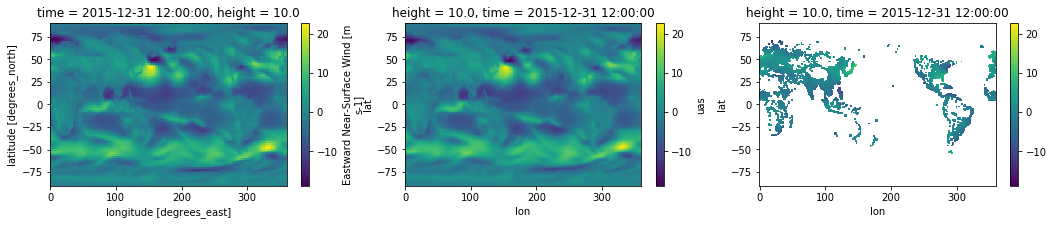

It takes elapsed_time 0.6681778430938721 to plot the layer
It takes elapsed_time 14.19589114189148 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/vas_day_GFDL-ESM2M_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.598008394241333 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/vas_day_GFDL-ESM2M_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2891101837158203 to load the data
*********Start to merge*********
It takes elapsed_time 1.3980348110198975 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.03200554847717285 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.24138617515564 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6542761325836182 to mask the layer
*********Start to plot the layer*********


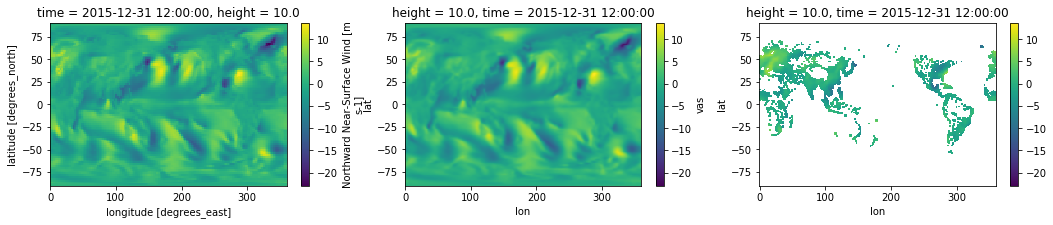

It takes elapsed_time 0.693748950958252 to plot the layer
It takes elapsed_time 14.309682369232178 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/pr_day_GFDL-ESM2M_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6182184219360352 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/pr_day_GFDL-ESM2M_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2140662670135498 to load the data
*********Start to merge*********
It takes elapsed_time 1.3551528453826904 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.03150224685668945 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.235901355743408 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6546993255615234 to mask the layer
*********Start to plot the layer*********


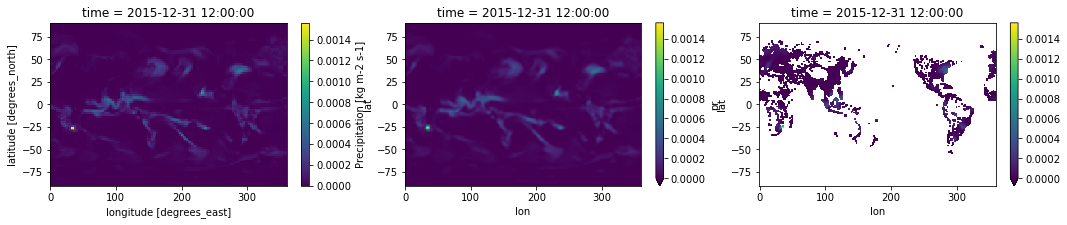

It takes elapsed_time 0.6714932918548584 to plot the layer
It takes elapsed_time 14.163469314575195 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/prsn_day_GFDL-ESM2M_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.5723390579223633 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/prsn_day_GFDL-ESM2M_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2125084400177002 to load the data
*********Start to merge*********
It takes elapsed_time 1.3877265453338623 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.06598377227783203 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.255276918411255 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6557302474975586 to mask the layer
*********Start to plot the layer*********


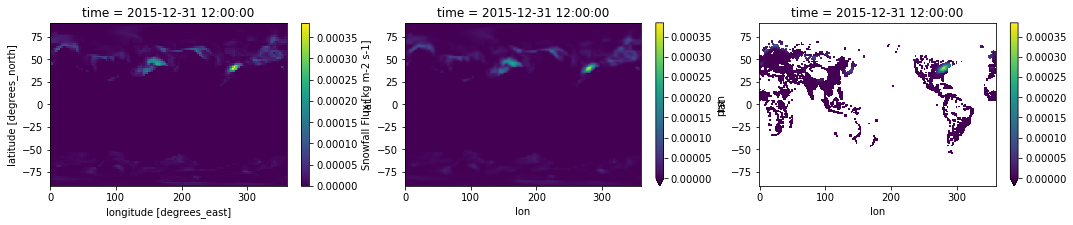

It takes elapsed_time 0.6637654304504395 to plot the layer
It takes elapsed_time 14.242137432098389 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rlds_day_GFDL-ESM2M_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6163074970245361 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rlds_day_GFDL-ESM2M_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2134945392608643 to load the data
*********Start to merge*********
It takes elapsed_time 1.3705382347106934 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.03089761734008789 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.274905681610107 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6562469005584717 to mask the layer
*********Start to plot the layer*********


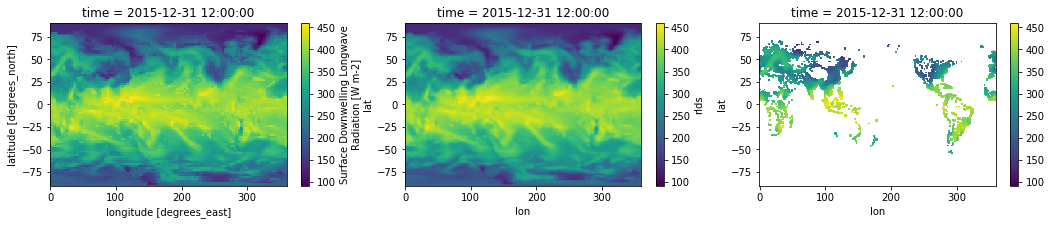

It takes elapsed_time 0.7025144100189209 to plot the layer
It takes elapsed_time 14.249255895614624 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rlus_day_GFDL-ESM2M_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6188721656799316 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rlus_day_GFDL-ESM2M_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2275176048278809 to load the data
*********Start to merge*********
It takes elapsed_time 1.369516372680664 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.03070521354675293 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.290965557098389 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6563973426818848 to mask the layer
*********Start to plot the layer*********


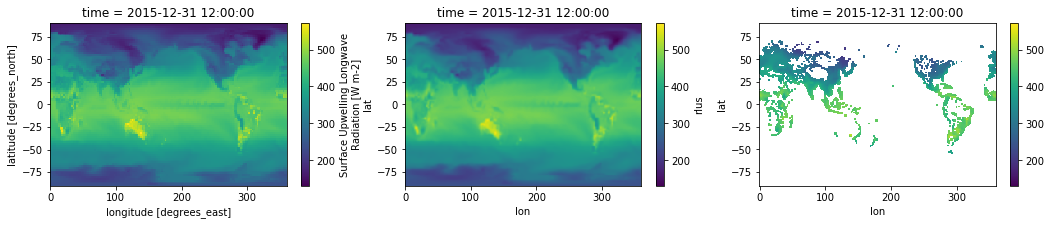

It takes elapsed_time 0.65627121925354 to plot the layer
It takes elapsed_time 14.23241138458252 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rsds_day_GFDL-ESM2M_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6235368251800537 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rsds_day_GFDL-ESM2M_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.1951384544372559 to load the data
*********Start to merge*********
It takes elapsed_time 1.3526828289031982 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.03113412857055664 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.277400970458984 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6581811904907227 to mask the layer
*********Start to plot the layer*********


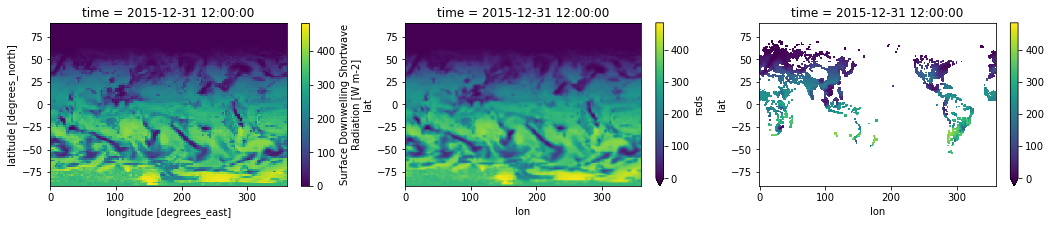

It takes elapsed_time 0.6639871597290039 to plot the layer
It takes elapsed_time 14.179604053497314 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rsus_day_GFDL-ESM2M_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6194474697113037 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rsus_day_GFDL-ESM2M_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2393290996551514 to load the data
*********Start to merge*********
It takes elapsed_time 1.3574965000152588 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.0311279296875 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.251690149307251 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6531200408935547 to mask the layer
*********Start to plot the layer*********


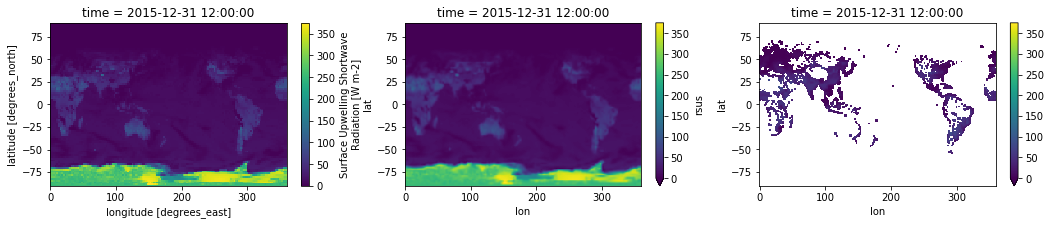

It takes elapsed_time 0.6748538017272949 to plot the layer
It takes elapsed_time 14.208688020706177 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2016, 5)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 28.274171352386475 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

248.17571759223938


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/huss_day_GFDL-ESM2M_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.5964877605438232 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/huss_day_GFDL-ESM2M_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.185117483139038 to load the data
*********Start to merge*********
It takes elapsed_time 1.375807285308838 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.031229019165039062 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.250744342803955 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6518707275390625 to mask the layer
*********Start to plot the layer*********


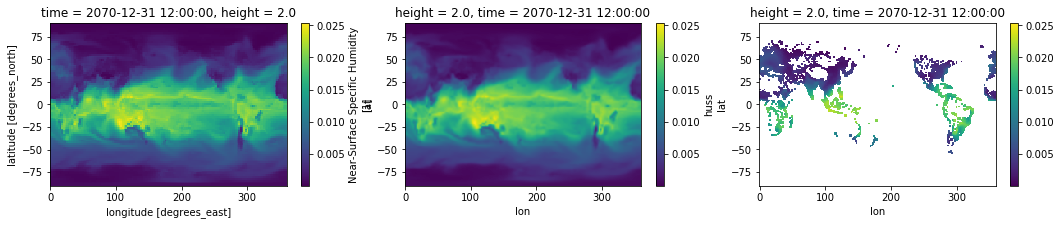

It takes elapsed_time 0.6659643650054932 to plot the layer
It takes elapsed_time 14.161677122116089 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/tas_day_GFDL-ESM2M_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6032872200012207 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/tas_day_GFDL-ESM2M_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.173100233078003 to load the data
*********Start to merge*********
It takes elapsed_time 1.3481652736663818 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.030734539031982422 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.217078447341919 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6527302265167236 to mask the layer
*********Start to plot the layer*********


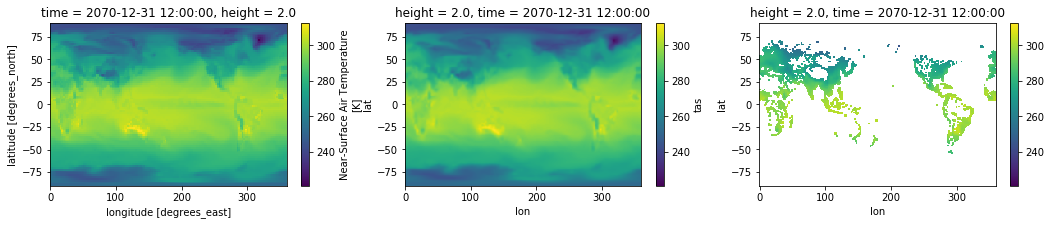

It takes elapsed_time 0.6518259048461914 to plot the layer
It takes elapsed_time 14.074650287628174 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/uas_day_GFDL-ESM2M_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6127059459686279 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/uas_day_GFDL-ESM2M_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.2153453826904297 to load the data
*********Start to merge*********
It takes elapsed_time 1.36104416847229 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.030663251876831055 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.21742296218872 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6479578018188477 to mask the layer
*********Start to plot the layer*********


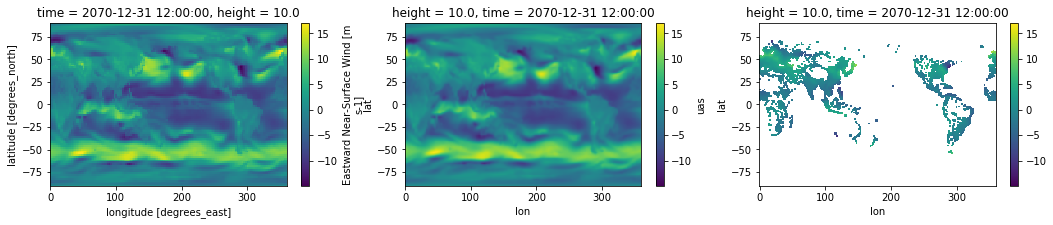

It takes elapsed_time 0.6808936595916748 to plot the layer
It takes elapsed_time 14.153993368148804 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/vas_day_GFDL-ESM2M_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6163856983184814 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/vas_day_GFDL-ESM2M_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.2210283279418945 to load the data
*********Start to merge*********
It takes elapsed_time 1.370392084121704 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.03180646896362305 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.219643115997314 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6537411212921143 to mask the layer
*********Start to plot the layer*********


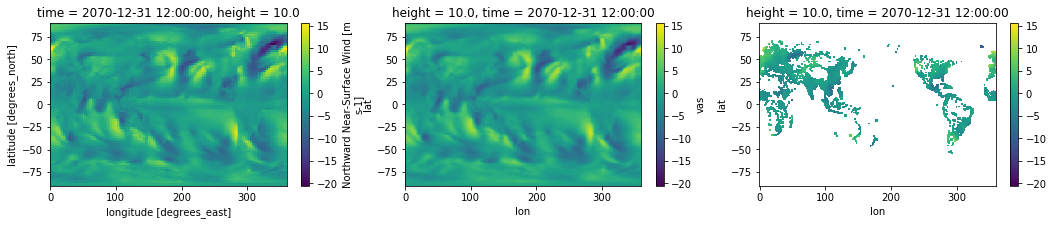

It takes elapsed_time 0.6979551315307617 to plot the layer
It takes elapsed_time 14.195231676101685 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/pr_day_GFDL-ESM2M_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6638877391815186 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/pr_day_GFDL-ESM2M_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.258251428604126 to load the data
*********Start to merge*********
It takes elapsed_time 1.3667666912078857 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.04919862747192383 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.218705892562866 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6480867862701416 to mask the layer
*********Start to plot the layer*********


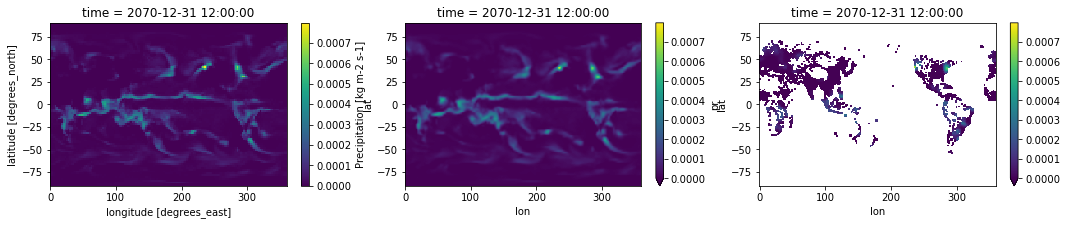

It takes elapsed_time 0.6827528476715088 to plot the layer
It takes elapsed_time 14.224767684936523 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/prsn_day_GFDL-ESM2M_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6555647850036621 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/prsn_day_GFDL-ESM2M_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.2830467224121094 to load the data
*********Start to merge*********
It takes elapsed_time 1.3601090908050537 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.03078603744506836 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.254377365112305 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6532127857208252 to mask the layer
*********Start to plot the layer*********


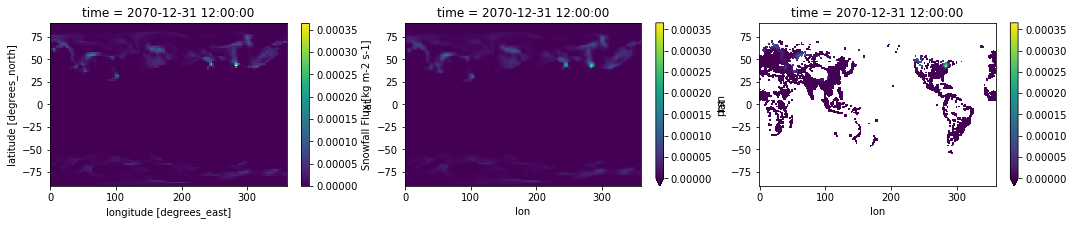

It takes elapsed_time 0.6568682193756104 to plot the layer
It takes elapsed_time 14.239453077316284 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rlds_day_GFDL-ESM2M_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6874299049377441 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rlds_day_GFDL-ESM2M_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.3922336101531982 to load the data
*********Start to merge*********
It takes elapsed_time 1.388890027999878 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.03158068656921387 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.232795715332031 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6535735130310059 to mask the layer
*********Start to plot the layer*********


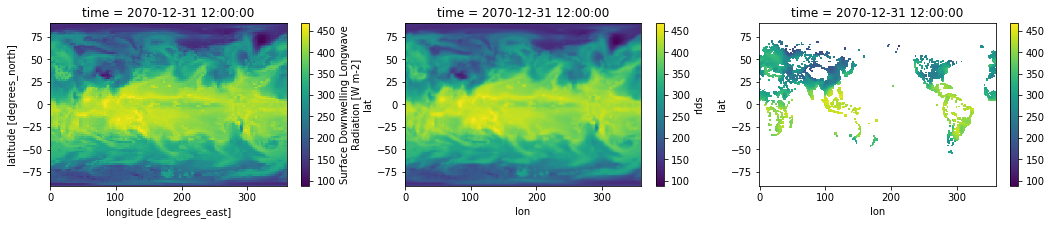

It takes elapsed_time 0.6919193267822266 to plot the layer
It takes elapsed_time 14.391847372055054 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rlus_day_GFDL-ESM2M_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6214702129364014 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rlus_day_GFDL-ESM2M_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.2365391254425049 to load the data
*********Start to merge*********
It takes elapsed_time 1.3907980918884277 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.030993223190307617 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.236138343811035 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6523942947387695 to mask the layer
*********Start to plot the layer*********


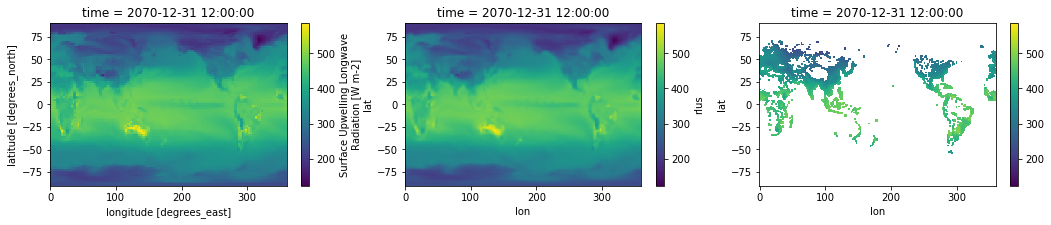

It takes elapsed_time 0.6498844623565674 to plot the layer
It takes elapsed_time 14.197397470474243 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rsds_day_GFDL-ESM2M_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.659041166305542 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rsds_day_GFDL-ESM2M_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.266324758529663 to load the data
*********Start to merge*********
It takes elapsed_time 1.3784034252166748 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.031022310256958008 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.236240148544312 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6536924839019775 to mask the layer
*********Start to plot the layer*********


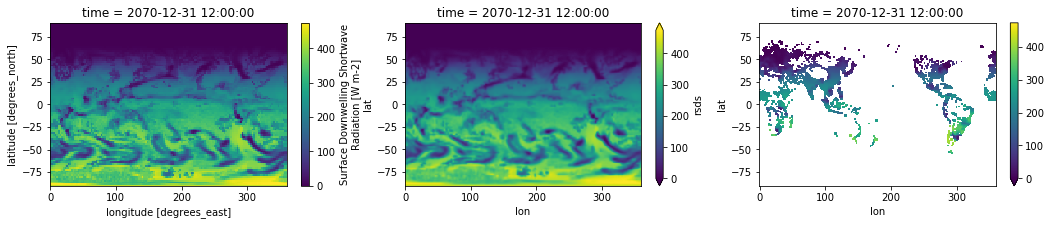

It takes elapsed_time 0.6576147079467773 to plot the layer
It takes elapsed_time 14.224111080169678 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rsus_day_GFDL-ESM2M_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6595988273620605 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2M/rsus_day_GFDL-ESM2M_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.2543199062347412 to load the data
*********Start to merge*********
It takes elapsed_time 1.3700077533721924 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.03101658821105957 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.215880155563354 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6559088230133057 to mask the layer
*********Start to plot the layer*********


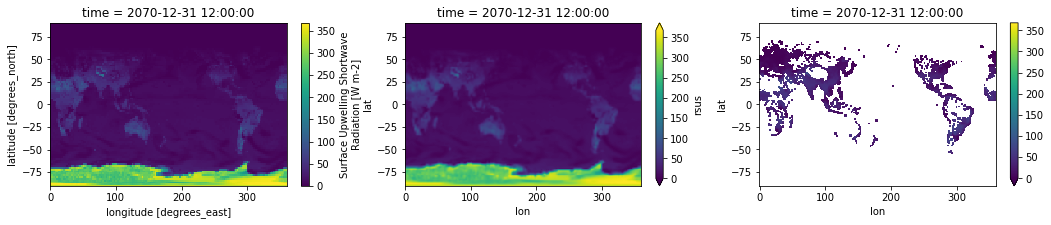

It takes elapsed_time 0.6762299537658691 to plot the layer
It takes elapsed_time 14.204208374023438 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2061, 2071, 5)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 28.30741548538208 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

248.2763409614563
